# MovieLens Hybrid Recommender System

# Business Problem:

Estimate using the item-based and user-based recommender methods for the user whose ID is given.

# Dataset Story:

The dataset was provided by MovieLens, a movie recommendation service.

It contains the rating scores for these movies along with the movies.

It contains 2,000,0263 ratings across 27,278 movies.

This data was provided by 138,493 users from January 09, 1995 to March 31, 2015.
was created between This data set was created on October 17, 2016.

Users are randomly selected. It is known that all selected users voted for at least 20 movies.

# Variables:

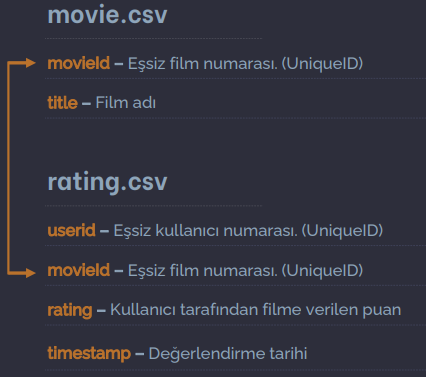


# Project Steps

# TASK 1:

Perform the Data Preparation operations.

In [53]:
import pandas as pd
pd.set_option("display.max_columns", 20)
pd.pandas.set_option('display.width', 300)

In [54]:
movie = pd.read_csv("../input/movielens-20m-dataset/movie.csv")
movie.shape

(27278, 3)

In [55]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
rating = pd.read_csv("../input/movielens-20m-dataset/rating.csv")
rating.shape

(20000263, 4)

In [57]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [58]:
df = movie.merge(rating, how="left", on="movieId")
df.shape

(20000797, 6)

In [59]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [60]:
df["title"].nunique()

27262

In [61]:
df["title"].value_counts().head()

Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: title, dtype: int64

In [62]:
comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= 1000].index
common_movies = df[~df["title"].isin(rare_movies)] 
common_movies.shape

(17766015, 6)

In [63]:
common_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [64]:
common_movies["title"].nunique()

3159

In [65]:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.shape

(138493, 3159)

In [66]:
user_movie_df.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
user_movie_df.columns
len(user_movie_df.columns)

3159

In [68]:
common_movies["title"].nunique()

3159

# TASK 2:

Determine the movies watched by the user to be recommended.

Let's proceed with a #random user.

In [69]:
random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values)
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df.shape

(1, 3159)

In [70]:
#Let's look at the movies watched by the user we have chosen:

movies_watched = random_user_df.columns[random_user_df.notna().any()].to_list()


In [71]:
len(movies_watched)

33

In [72]:
user_movie_df.loc[user_movie_df.index == random_user, user_movie_df.columns =="Jurassic Park (1993)"]

title,Jurassic Park (1993)
userId,
28941.0,3.0


# TASK 3:

Access data and Ids of other users watching the same movies.

In [73]:
pd.set_option("display.max_columns", 5)
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.shape

(138493, 33)

In [74]:
movies_watched_df.head()

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Star Trek: Generations (1994),Stargate (1994)
userId,,,,,
1.0,NaN,NaN,...,NaN,NaN
2.0,NaN,NaN,...,NaN,NaN
3.0,NaN,NaN,...,5.0,5.0
4.0,NaN,3.0,...,3.0,NaN
5.0,NaN,NaN,...,NaN,4.0


In [75]:
user_movie_count = movies_watched_df.T.notnull().sum()

In [76]:
user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["userId", "movie_count"]
user_movie_count.shape

(138493, 2)

In [77]:
user_movie_count.head()

,userId,movie_count
0,1.0,1
1,2.0,2
2,3.0,4
3,4.0,6
4,5.0,11


In [78]:
user_movie_count[user_movie_count["movie_count"] > 20].sort_values("movie_count", ascending=False)
user_movie_count[user_movie_count["movie_count"] == len(movies_watched)].count()

userId         17
movie_count    17
dtype: int64

# TASK 4:

Identify the users who are most similar to the user to be suggested.

In [79]:
perc = len(movies_watched) * 60 / 100
perc

19.8

In [80]:
#person ids who watched 60% of the same movie as the user
users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
users_same_movies.count()

4139

In [81]:
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies.index)],random_user_df[movies_watched]])
final_df.shape

(4140, 33)

In [82]:
final_df.T.corr()

userId,90.0,129.0,...,138482.0,28941.0
userId,,,,,
90.0,1.000000e+00,8.779946e-01,...,NaN,-0.279828
129.0,8.779946e-01,1.000000e+00,...,NaN,0.154227
155.0,NaN,NaN,...,NaN,NaN
157.0,1.000000e+00,1.000000e+00,...,NaN,NaN
159.0,5.000000e-01,1.000000e+00,...,NaN,0.530330
...,...,...,...,...,...
138278.0,NaN,NaN,...,NaN,NaN
138381.0,-3.140185e-16,-3.972055e-16,...,NaN,0.088697
138414.0,-9.614813e-17,6.002450e-01,...,NaN,-0.227710


In [83]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ["user_id_1", "user_id_2"]
corr_df = corr_df.reset_index()

In [84]:
# Let's look at those that have a 65% correlation with the user:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][["user_id_2", "corr"]].reset_index(drop=True)

In [85]:
# Let's take a look at the ones with the least correlation with #user:
top_users = top_users.sort_values(by="corr", ascending=False)

In [86]:
top_users.rename(columns={"user_id_2":"userId"}, inplace=True)
top_users.shape

(11, 2)

In [87]:
top_users.head()

,userId,corr
10,34006.0,0.980581
9,107125.0,0.892885
8,11416.0,0.705431
7,87093.0,0.690941
6,69431.0,0.688530


In [88]:
rating = pd.read_csv("../input/movielens-20m-dataset/rating.csv")
top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how="inner")
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]
top_users_ratings["userId"].unique()

array([ 34006., 107125.,  11416.,  87093.,  69431., 137557., 134822.,
        41388.,  51620.,  75178.,  48404.])

# TASK 5

Calculate the Weighted Average Recommendation Score and keep the first 5 movies.

In [89]:
top_users_ratings["weighted_rating"] = top_users_ratings["corr"] * top_users_ratings["rating"]
top_users_ratings.head()

,userId,corr,movieId,rating,weighted_rating
0,34006.0,0.980581,7,3.0,2.941742
1,34006.0,0.980581,150,0.5,0.490290
2,34006.0,0.980581,173,2.0,1.961161
3,34006.0,0.980581,225,1.0,0.980581
4,34006.0,0.980581,494,2.0,1.961161


In [90]:
top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})#singularization by movies

,weighted_rating
movieId,
1,3.116352
2,1.675794
3,1.958276
6,2.935694
7,2.841561
...,...
89904,2.296264
91529,1.640188
92259,3.280376


In [91]:
recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,movieId,weighted_rating
0,1,3.116352
1,2,1.675794
2,3,1.958276
3,6,2.935694
4,7,2.841561


In [92]:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.5].sort_values("weighted_rating", ascending=False)

# TASK 6

Make an item-based suggestion based on the name of the movie that the user has watched with the highest score.

> 5 recommendations user-based

> 5 suggestions item-based

> Make 10 suggestions.

In [93]:
movies_to_be_recommend.merge(movie[["movieId", "title"]])["title"].head()

0    Mummy: Tomb of the Dragon Emperor, The (2008)
1                                    Snatch (2000)
2                             Prestige, The (2006)
3                                 Labyrinth (1986)
4                       Black Stallion, The (1979)
Name: title, dtype: object

In [94]:
user = 28941
movie = pd.read_csv("../input/movielens-20m-dataset/movie.csv")
rating = pd.read_csv("../input/movielens-20m-dataset/rating.csv")

In [95]:
movie_id = rating[(rating["userId"] == user) & (rating["rating"] == 5.0)].sort_values(by="timestamp", ascending = False)["movieId"][0:1].values[0]

In [96]:
movie_name = movie[movie["movieId"] == movie_id]["title"].values[0]
movie_name = user_movie_df[movie_name]
movies_from_item_based = user_movie_df.corrwith(movie_name).sort_values(ascending=False)
movies_from_item_based[1:6].index

Index(['Intouchables (2011)', 'Father of the Bride (1991)', 'Anna and the King (1999)', 'Runaway Bride (1999)', 'Phantom of the Opera, The (2004)'], dtype='object', name='title')